**Представьте что вы, невероятно богатый и успешный глава хедж-фонда,
демонстрирующего рекордные показатели прибыли. К вам обращается очень
серьезный и влиятельный (кстати, и очень опасный) инвестор. Он хочет приумножить
свои миллионы и готов перевести деньги на ваш счет в течение часа. НО! Если вы
допустите ошибку и потеряете часть его вложений, он объявит вам войну.
Вроде бы и не сложно, но именно в этот момент - на вашей дороге появляется
достаточно сильный конкурент, который наступает вам на пятки. Ваша задача,
проанализировать рынок и сделать все, чтобы найти оптимальный и наиболее
выгодный вариант, чтобы удержаться в лидирующих позициях и не нажить себе
сильного врага.**

Данные, с которыми вы будете работать, можно скачать ​ [здесь](https://). Это csv-файлы,
возьмите данные за последние 5 лет по нескольким компаниям (не менее трех).

# Задача 1: Визуализируй это

Загрузите данные и выполните следующие задания:
-    постройте графики стоимости акций на начало каждого дня
-    отразите на графике объёмы торгов за каждый день. Прокомментируйте
полученные графики: определите, какие события могли повлиять на повышение
объёма (отчёт компании, кризис и т. п.)
-    добавьте ко всем графикам легенду
-    определите, цены каких компаний наиболее и наименее скоррелированы


Выбрали для анализа следующие компании:

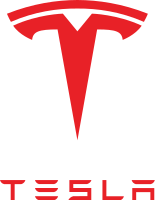   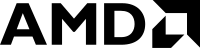   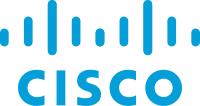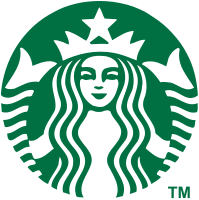

In [ ]:
# Загрузим необходимые для работы библиотеки
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import datetime as dt
import plotly.figure_factory as ff

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Установка бибилиотек
# ! pip install plotly==4.14.1

In [ ]:
# Загружаем данные
#url_tesla = 'https://www.nasdaq.com/api/v1/historical/TSLA/stocks/2015-12-09/2020-12-09'
#url_amd = 'https://www.nasdaq.com/api/v1/historical/AMD/stocks/2015-12-09/2020-12-09'
#url_csco = 'https://www.nasdaq.com/api/v1/historical/CSCO/stocks/2015-12-09/2020-12-09'
#url_starbucks = 'https://www.nasdaq.com/api/v1/historical/SBUX/stocks/2015-12-09/2020-12-09'
# Так как по прямому url  с сайта https://www.nasdaq.com/market-activity/quotes/historical загрузка идёт очень долго,
# то скачали с сайта csv и сохранили на Google.drive


In [ ]:
url_tesla = 'https://drive.google.com/file/d/1S-aaX9mE7BVq0RZkgNxcDdxoRqyoo5V7/view?usp=sharing'
url_amd = 'https://drive.google.com/file/d/14dGiiLXfh2RTtrjWR-g4C4oO3ebOL5mX/view?usp=sharing'
url_csco = 'https://drive.google.com/file/d/1hh0gTkM07urL2QsGmS37PHZrKPptzyul/view?usp=sharing'
url_starbucks = 'https://drive.google.com/file/d/1RKZFK5eaGplD1UR5Ia4eebT6jdbVJAQp/view?usp=sharing'

In [ ]:
# Обрабатываем данные

def load_data_sets(url):
    path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
    df = pd.read_csv(path,index_col=0, parse_dates=True)
    # Избавимся от знака $ в столбцах
    df[[' Close/Last', ' Open', ' High', ' Low']] = df[[' Close/Last', ' Open', ' High', ' Low']].replace({'\$':''}, regex = True)
    # Преобразуем значения к типу float
    df[[' Close/Last', ' Open', ' High', ' Low']] = df[[' Close/Last', ' Open', ' High', ' Low']].astype(float)
    # заполним данные по пропущенным дням
    # метод resample('d') выполняет группировку данных по дням,
    # а ffill заполнит получившиеся пропуски, взяв предыдущее значение вместо пропущенного
    df = df.resample('d').ffill() 
    df = df.sort_index()
    # Удаление пробелов в названиях столбцов
    df.columns = df.columns.str.replace(' ','')
    return df[['Open','Volume','Close/Last']]

In [ ]:
tesla_set = load_data_sets(url_tesla)
amd_set = load_data_sets(url_amd)
csco_set = load_data_sets(url_csco)
starbucks_set = load_data_sets(url_starbucks)
starbucks_set.tail()

print(tesla_set.shape,amd_set.shape,csco_set.shape,starbucks_set.shape)

(1827, 3) (1827, 3) (1827, 3) (1827, 3)


In [ ]:
# создадим отдельные Series для цен открытия биржи
tesla_open = tesla_set[['Open']]
amd_open = amd_set[['Open']]
csco_open = csco_set[['Open']]
starbucks_open = starbucks_set[['Open']]


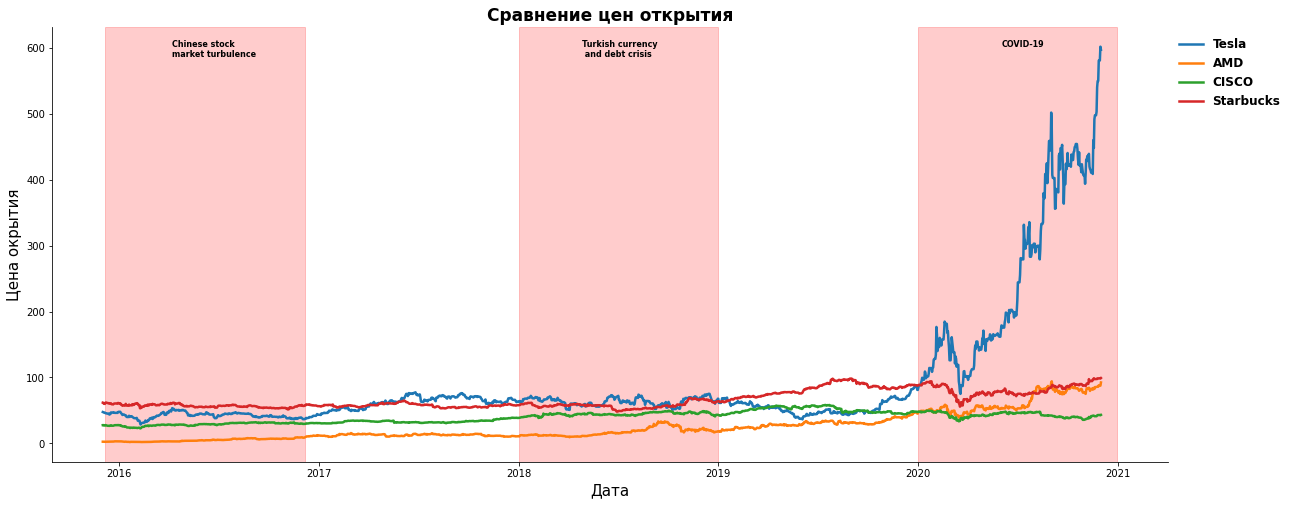

In [ ]:
font = font_manager.FontProperties(family= 'DejaVu Sans',
                                   weight='bold',
                                   style='normal', size=12)
plt.figure(figsize=(20,8))
plt.plot(tesla_set['Open'],label="Tesla",linewidth=2.5)
plt.plot(amd_set['Open'],label="AMD",linewidth=2.5)
plt.plot(csco_set['Open'],label="CISCO",linewidth=2.5)
plt.plot(starbucks_set['Open'],label="Starbucks",linewidth=2.5)
plt.title('Сравнение цен открытия',fontsize=17, fontweight="bold")
plt.xlabel('Дата', fontsize=15) 
plt.ylabel('Цена окрытия', fontsize=15)
# Легенда
plt.gca().legend(bbox_to_anchor=(1, 1),framealpha=0.0, prop=font) 
#Выделяем периоды кризисов
plt.axvspan(dt.date(2020,1,1), dt.date(2020,1,1)+dt.timedelta(days=365), color='red', alpha=0.2)
plt.axvspan(dt.date(2015,12,6), dt.date(2015,12,6)+dt.timedelta(days=365), color='red', alpha=0.2)
plt.axvspan(dt.date(2018,1,1), dt.date(2018,1,1)+dt.timedelta(days=365), color='red', alpha=0.2)
#Создание подписей для кризисов
plt.annotate("COVID-19", xy=(920, 400),  xycoords='axes points',
            xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")
plt.annotate("Chinese stock \nmarket turbulence", xy=(90, 390),  xycoords='axes points',
            xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")
plt.annotate("Turkish currency\n and debt crisis", xy=(500, 390),  xycoords='axes points',
            xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")
# Удаляем правую и верхнюю рамку
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# Удаление сетки
plt.grid(False)

plt.show()

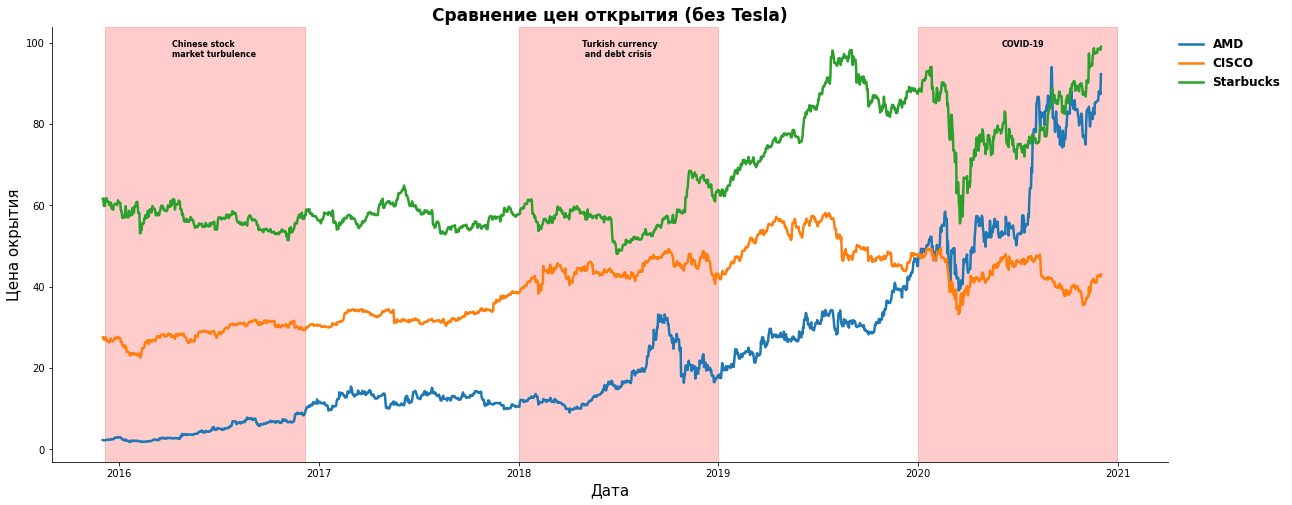

In [ ]:
#Зум на все без Теслы
font = font_manager.FontProperties(family= 'DejaVu Sans',
                                   weight='bold',
                                   style='normal', size=12)
plt.figure(figsize=(20,8))
# plt.plot(tesla_set['Open'],label="Tesla",linewidth=2.5)
plt.plot(amd_set['Open'],label="AMD",linewidth=2.5)
plt.plot(csco_set['Open'],label="CISCO",linewidth=2.5)
plt.plot(starbucks_set['Open'],label="Starbucks",linewidth=2.5)
plt.title('Сравнение цен открытия (без Tesla)',fontsize=17, fontweight="bold")
plt.xlabel('Дата', fontsize=15) 
plt.ylabel('Цена окрытия', fontsize=15)
# Легенда
plt.gca().legend(bbox_to_anchor=(1, 1),framealpha=0.0, prop=font) 
#Выделяем периоды кризисов
plt.axvspan(dt.date(2020,1,1), dt.date(2020,1,1)+dt.timedelta(days=365), color='red', alpha=0.2)
plt.axvspan(dt.date(2015,12,6), dt.date(2015,12,6)+dt.timedelta(days=365), color='red', alpha=0.2)
plt.axvspan(dt.date(2018,1,1), dt.date(2018,1,1)+dt.timedelta(days=365), color='red', alpha=0.2)
#Создание подписей для кризисов
plt.annotate("COVID-19", xy=(920, 400),  xycoords='axes points',
            xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")
plt.annotate("Chinese stock \nmarket turbulence", xy=(90, 390),  xycoords='axes points',
            xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")
plt.annotate("Turkish currency\n and debt crisis", xy=(500, 390),  xycoords='axes points',
            xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")
# Удаляем правую и верхнюю рамку
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# Удаление сетки
plt.grid(False)

plt.show()

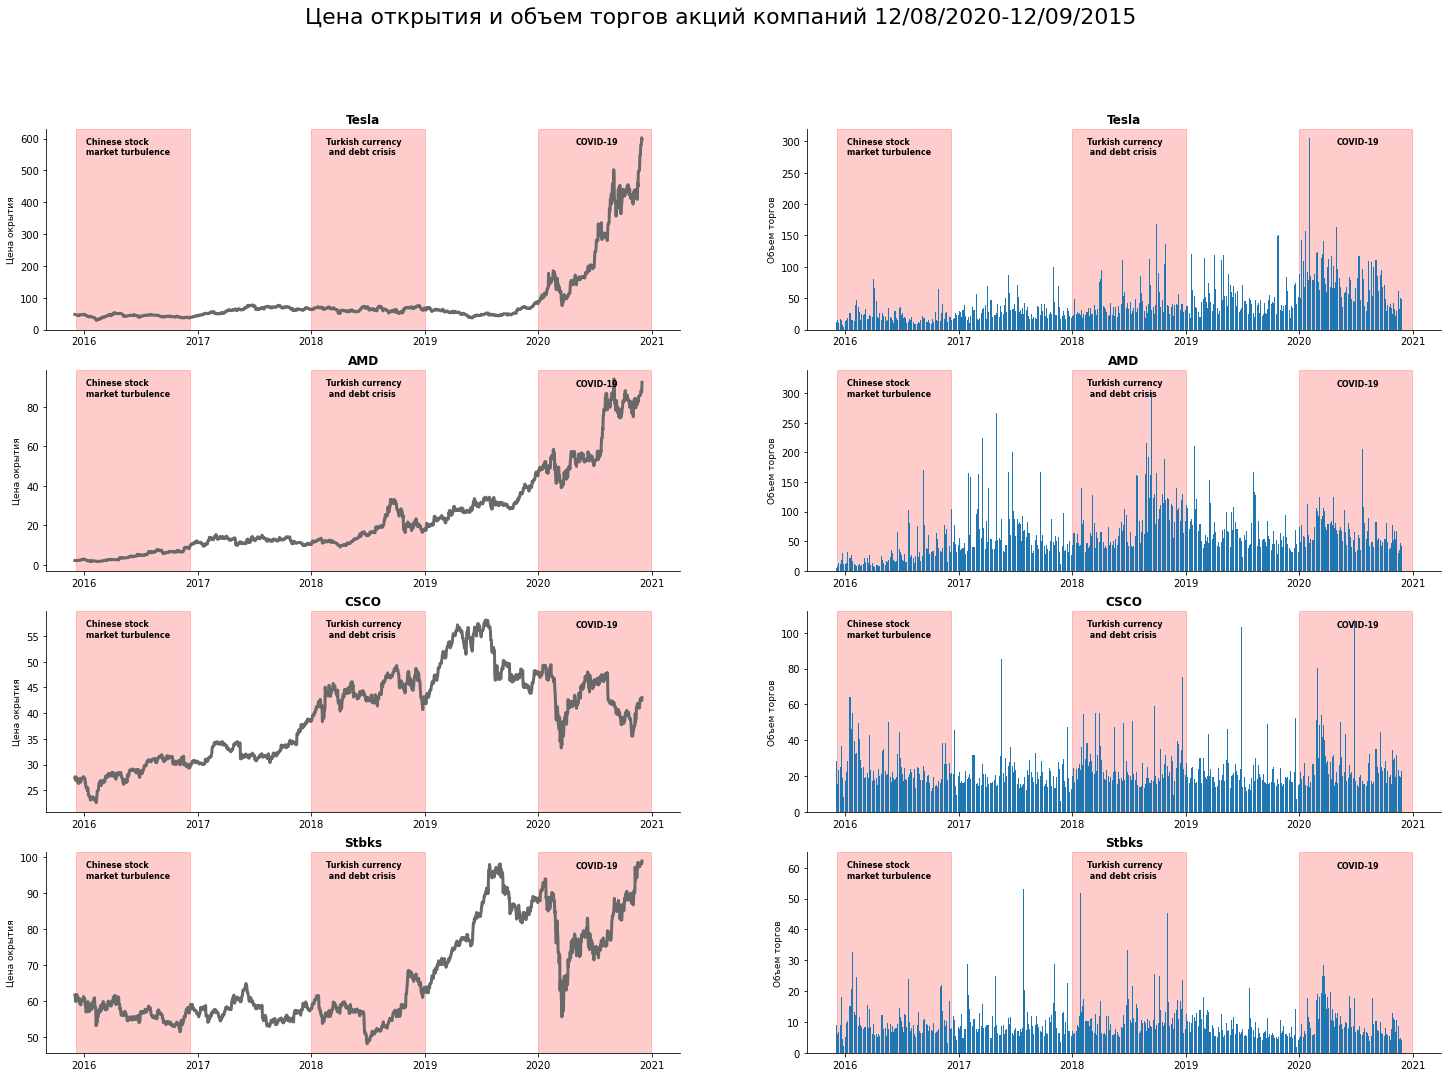

In [ ]:
#Отдельные графики для каждой компании v2

fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(25,17))

ax_list = [ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8]
label_list = ['Tesla','AMD','CSCO','Stbks']
fig.suptitle('Цена открытия и объем торгов акций компаний 12/08/2020-12/09/2015', fontsize=22)
font = font_manager.FontProperties(family= 'DejaVu Sans',
                                   weight='bold',
                                   style='normal', size=12)
for m,df in enumerate([tesla_set,amd_set,csco_set,starbucks_set]):
    ax_list[2*m].plot(df['Open'],label=label_list[m],linewidth=3,color='dimgray')
    ax_list[2*m].set_ylabel('Цена окрытия', fontsize=9) 
    ax_list[2*m+1].axvspan(dt.date(2020,1,1), dt.date(2020,1,1)+dt.timedelta(days=365), color='red', alpha=0.2)
    ax_list[2*m+1].axvspan(dt.date(2015,12,6), dt.date(2015,12,6)+dt.timedelta(days=365), color='red', alpha=0.2)
    ax_list[2*m+1].axvspan(dt.date(2018,1,1), dt.date(2018,1,1)+dt.timedelta(days=365), color='red', alpha=0.2)
    ax_list[2*m+1].annotate("COVID-19", xy=(500, 170),  xycoords='axes points',
            xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")
    ax_list[2*m+1].annotate("Chinese stock \nmarket turbulence", xy=(10, 160),  xycoords='axes points',
            xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")
    ax_list[2*m+1].annotate("Turkish currency\n and debt crisis", xy=(250, 160),  xycoords='axes points',
            xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")

    ax_list[2*m].axvspan(dt.date(2020,1,1), dt.date(2020,1,1)+dt.timedelta(days=365), color='red', alpha=0.2)
    ax_list[2*m].axvspan(dt.date(2015,12,6), dt.date(2015,12,6)+dt.timedelta(days=365), color='red', alpha=0.2)
    ax_list[2*m].axvspan(dt.date(2018,1,1), dt.date(2018,1,1)+dt.timedelta(days=365), color='red', alpha=0.2)
    # ax_list[2*m].legend(bbox_to_anchor=(0.5, 1.05),framealpha=0.0, prop=font)
    ax_list[2*m].set_title(label_list[m], fontweight="bold")
    ax_list[2*m].annotate("COVID-19", xy=(500, 170),  xycoords='axes points',
            xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")
    ax_list[2*m].annotate("Chinese stock \nmarket turbulence", xy=(10, 160),  xycoords='axes points',
            xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")
    ax_list[2*m].annotate("Turkish currency\n and debt crisis", xy=(250, 160),  xycoords='axes points',
            xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")
    ax_list[2*m+1].bar(df.index,df['Volume']/1000000,label=label_list[m])
    ax_list[2*m+1].set_ylabel('Объем торгов', fontsize=9) 
    # ax_list[2*m+1].legend(bbox_to_anchor=(1, 1.05),framealpha=0.0, prop=font)
    ax_list[2*m+1].set_title(label_list[m], fontweight="bold")
for i in ax_list:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)

# Удаление сетки
for i in ax_list:
    i.grid(False)
# ax1.set_title('Цена открытия', fontsize=20)
# ax2.set_title('Объем торгов', fontsize=20)

# ax1.annotate("COVID-19", xy=(500, 130),  xycoords='axes points',
#             xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")
# ax2.annotate("COVID-19", xy=(500, 130),  xycoords='axes points',
#             xytext=(30, 15), textcoords='offset points',fontsize=8, fontweight="bold")
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


label_list = ['Tesla','AMD','CSCO','Stbks']
fig = make_subplots(rows=4, cols=1,subplot_titles=label_list, x_title='Дата',specs=[[{"secondary_y": True}], [{"secondary_y": True}],[{"secondary_y": True}], [{"secondary_y": True}]])
for m,df in enumerate([tesla_set,amd_set,csco_set,starbucks_set]):
    fig.add_trace(go.Bar(x=df.index, y=df['Volume']/1000000,marker=dict(line=dict(color='rgba(78, 139, 244, 1.0)'))),row=m+1, col=1, secondary_y=False)
    fig.add_trace(go.Scatter(x=df.index, y=df['Open'],marker=dict(line=dict(color='rgba(78, 139, 244, 1.0)'))),row=m+1, col=1, secondary_y=True)
    fig.update_layout(height=1200, width=1200,showlegend=False)
    fig.update_yaxes(title_text = 'Цена открытия',
                       secondary_y = True)
        # Set y-axes titles
    fig.update_yaxes(
        title_text="Объем*10^6", 
        secondary_y=False)

fig.show()

1. Рост акций компании Тесла в 2020. 
Можно объяснить следующими факторами:
 - поддержки экономики в США и ЕС на триллионы долларов
 - ряд успешных партнерств с компаниями: с Panasonic и CATL в части производства аккумуляторов
 - рост поставок атомобилей. В конце января 2020 года Tesla [отчиталась](https://ir.tesla.com/static-files/b3cf7f5e-546a-4a65-9888-c928b914b529), что в четвёртом квартале 2019 года поставки электромобилей выросли на 23% и составили 112 тысяч, а по итогам года достигли рекордных 367 тысяч. Таким образом, компания выполнила цель отгрузить 360-400 тысяч автомобилей, которую поставил гендиректор Tesla Илон Маск. В 2020 году компания планирует поставить как минимум 500 тысяч электромобилей.
Также у Теслы есть ряд успешных партнерств с компаниями: с Panasonic и CATL в части производства аккумуляторов
 - успешный запуск компанией Илона Маска первого в истории пилотируемого полета, совершенного частной компанией (может повысить доверие ко всем его компаниям)
2. Рост объемов Тесла в начале февраля 2020 г связывают с оптимистичным прогнозом ряда аналитиков
3. 27 авгутса 2018 г Акции производителя чипов AMD выросли в понедельник более чем на 5%, достигнув 12-летнего максимума скорее всего именно это и отразилось на объеме торгов. Это связывают с тем, что компания развивала на тот момент технологии облачных вычислений и планировала запустить наночип.
4. Падение акций cisco в августе 2020 связывают с квартальным отчетом компании, который оказался более оптимистичным, чем прогнозы аналитиков.
2. Интересно, что с ростом цены акций компании AMD нет такой же тенденции к росту объема торгов(Их что ли меньше покупают)
6. У всех компаний можно отметить падение стоимости акций  в марте 2020 - реакция на пандемию

In [ ]:
# Корреляции
# total_company_set = tesla_set.merge(amd_set,left_index=True,right_index=True,suffixes=('_tesla','_amd')).merge(csco_set,left_index=True,right_index=True).merge(starbucks_set,left_index=True,right_index=True,suffixes=('_csco','_stb'))

# corrs = total_company_set.corr()
# corrs.style.background_gradient(cmap='coolwarm')

In [ ]:
# Корреляции
total_company_set = tesla_set.merge(amd_set,left_index=True,right_index=True,suffixes=('_tesla','_amd')).merge(csco_set,left_index=True,right_index=True).merge(starbucks_set,left_index=True,right_index=True,suffixes=('_csco','_stb'))

corrs = total_company_set.corr()
# corr.style.background_gradient(cmap='coolwarm')
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.columns),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

Используем шкалу Чеддока для качественной оценки значения показателей корреляции Пирсона.
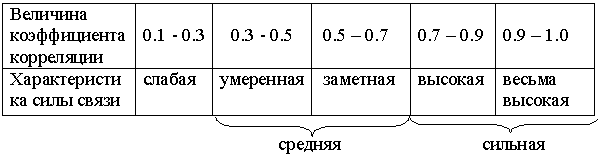

**Значимые корреляции по цене открытия:**
1. AMD и Tesla по шкале Чеддока высокая положительная корреляция (0.86)
2. Starbuks и AMD высокая положительная корреляция (0.76)
2. Tesla и Starbuks заметная положительная корреляция(0.5)
3. CISCO и Starbuks заметная положительная корреляция (0.61)

Самые сильные взаимосвязи на уровне покзаателей объемов торгов можно интерепретировать, как умеренные. Отдельные их опиания не представляются интересными.

**Выводы:** интересна высокая корреляция между AMD-TESLA, AMD-STARBUKS. Мб возможно для предикта использовать, как фичу - цену акций других компаний. И если вы хотите разделить ваши инвестиции, то лучше не вкладываться в акции, стоимость которых коррелирует друг с дургом

# Задача 2: Смоделируй это

Обучите линейную регрессию для предсказания цены закрытия на текущий день. В
качестве фичей возьмите цены открытия нескольких компаний за 7 дней до текущего
(включая текущий день). Цель обучения - предсказать цену закрытия на последний
день рассматриваемого промежутка для одной из компаний.

  ●   Сравните результат с бейзлайном - возвращайте цену открытия в качестве
предсказания. Для сравнения используйте MSE (Mean Square Error).

  ●   Посчитайте функцию ошибки на обучающем множестве и на тестовом. В
качестве тестового множества возьмите последние 100 дней.

  ●   Удостоверьтесь, что на обучающем множестве вы можете легко побить бейзлайн
(а на тестовом результат хуже, кроме одной акции с очевидным трендом).

Если вам удалось получить улучшение на тестовом множестве на всех акциях -
поздравляем, вы можете легко заработать несколько миллионов!


In [ ]:
forecast_out = 6
total_company_open_close = total_company_set.loc[:,total_company_set.columns[total_company_set.columns.str.contains('Volume')==False]]
total_company_open_close
Baseline_RMSE_list = []
LR_RMSE_train_list = []
LR_RMSE_test_list = []
for m in ['amd','csco','stb','tesla']:
  print(m)
  total_company_open_close = total_company_set.loc[:,total_company_set.columns[total_company_set.columns.str.contains('Volume')==False]]

  Y = total_company_open_close['Close/Last_'+m].reset_index()
  p=['Open_amd','Open_csco','Open_stb','Open_tesla']
  p.append('Close/Last_'+m)
  print(p)
  X = total_company_open_close[p]

  Y_train = Y[:-100].shift(-forecast_out)[:-6].set_index('Date')
  Y_test = Y[-100:].shift(-forecast_out)[:-6].set_index('Date')
  X_train =X[:-106].set_index(Y_train.index)
  X_test = X[-100:-6].set_index(Y_test.index)

  print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
  regr = LinearRegression(fit_intercept=True,normalize=True) 
  regr.fit(X_train,Y_train)
  mse_test = mean_squared_error(Y_test,regr.predict(X_test))
  mse_train = mean_squared_error(Y_train,regr.predict(X_train))
  base_mse = mean_squared_error(Y_test,X[-94:]['Open_'+m])
  Baseline_RMSE_list.append(round(np.sqrt(base_mse),2))
  LR_RMSE_train_list.append(round(np.sqrt(mse_train),2))
  LR_RMSE_test_list.append(round(np.sqrt(mse_test),2))
  # print(Y_test,X[-94:]['Open_'+m])
  print('Baseline_MSE:',round(base_mse),'MSE_test:',round(mse_test),'MSE_train:',round(mse_train))
  print('Baseline_RMSE:',round(np.sqrt(base_mse)),'RMSE_test:',round(np.sqrt(mse_test)),'RMSE_train:',round(np.sqrt(mse_train)))

amd
['Open_amd', 'Open_csco', 'Open_stb', 'Open_tesla', 'Close/Last_amd']
(1721, 5) (94, 5) (1721, 1) (94, 1)
Baseline_MSE: 4.0 MSE_test: 32.0 MSE_train: 4.0
Baseline_RMSE: 2.0 RMSE_test: 6.0 RMSE_train: 2.0
csco
['Open_amd', 'Open_csco', 'Open_stb', 'Open_tesla', 'Close/Last_csco']
(1721, 5) (94, 5) (1721, 1) (94, 1)
Baseline_MSE: 0.0 MSE_test: 4.0 MSE_train: 2.0
Baseline_RMSE: 0.0 RMSE_test: 2.0 RMSE_train: 1.0
stb
['Open_amd', 'Open_csco', 'Open_stb', 'Open_tesla', 'Close/Last_stb']
(1721, 5) (94, 5) (1721, 1) (94, 1)
Baseline_MSE: 1.0 MSE_test: 23.0 MSE_train: 4.0
Baseline_RMSE: 1.0 RMSE_test: 5.0 RMSE_train: 2.0
tesla
['Open_amd', 'Open_csco', 'Open_stb', 'Open_tesla', 'Close/Last_tesla']
(1721, 5) (94, 5) (1721, 1) (94, 1)
Baseline_MSE: 215.0 MSE_test: 2117.0 MSE_train: 75.0
Baseline_RMSE: 15.0 RMSE_test: 46.0 RMSE_train: 9.0


In [ ]:
result_df = pd.DataFrame([Baseline_RMSE_list,LR_RMSE_train_list,LR_RMSE_test_list]).transpose()
result_df.columns = ['Base_RMSE','LR_RMSE_train_1','LR_RMSE_test_1']


In [ ]:
# total_company_open_close = total_company_set.loc[:,total_company_set.columns[total_company_set.columns.str.contains('Volume')==False]]
# total_company_open_close

In [ ]:
# Y = total_company_open_close['Close/Last_'+'tesla'].reset_index()
# Y = Y[:-100].shift(-6)[:-6].set_index('Date')
# Y

In [ ]:
# total_company_open_close.head(7)
#Для Теслы цена закрытия 7го дня 45.414. Для прогноза цене закрытия сопоставляется цена открытия с 7 дневным лагом. Те для предсказания цены закрытия Тесла 2015-12-10	нужно взять данные за 2015-12-02

На тренировочной выборке удалось превзойти качество  baseline для прогноза цены закрытия акций для всех компаний.

Странно, что ни для одной компании не удалось превзойти качество baseline(

# Задача 3: Спроектируй (Докрути) это

Попробуйте разные варианты фичей, но не забывайте про переобучение - чем больше
признаков, тем больше модель способна “запомнить” исходные данные и менее
эффективна “реальных” данных. Далее приведём некоторые идеи для фичей.

**Идея для фичи №1.** ​ Если взять цены в качестве исходных данных, модель будет
плохо работать с будущим - цены, как правило, это сильно изменчивая категория.
Имеет смысл рассмотреть относительные изменения цен за предыдущие N дней
(буквально - насколько цены последующих дней отличаются от цен за предшествующий
период).

**Идея для фичи №2.** ​ В качестве альтернативы вы можете попробовать предсказать
только коэффициент - во сколько раз изменится цена к вечеру текущего дня (но не
забудьте произвести вычисление функции потерь на абсолютных значениях цены).
Кроме того, можно добавить цену за последний день, чтобы модель могла вывести как
коэффициент, так и абсолютное значение.

Идея для фичи №3. ​ Можно использовать некоторые статистики - например, дисперсию
цены за предыдущие дни, отклонения объёмов торгов и т. п. Можно брать скользящие
средние за предыдущие несколько недель.
Удостоверьтесь, что все эти улучшения уменьшают ошибку по сравнению с обычной
линейной регрессией на сырых ценах. Если вам удастся получить улучшение на
тестовом множестве - это большой успех!

Добавим к прежним фичам отношение цены конца периода к цене начала периода в 6 предшествующих до текущего дней.

In [ ]:
total_company_open_close = total_company_set.loc[:,total_company_set.columns[total_company_set.columns.str.contains('Volume')==False]]
total_company_open_close
Baseline_RMSE_list2 = []
LR_RMSE_train_list2 = []
LR_RMSE_test_list2 = []

for m in ['amd','csco','stb','tesla']:
  print(m)
  Y = total_company_open_close['Close/Last_'+m].reset_index()
  p=['Open_amd','Open_csco','Open_stb','Open_tesla']
  p.append('Close/Last_'+m)
  print(p)
  X = total_company_open_close[p]


  rw = 6 #7 включая текущий день, те нужно значение -1
  Y_train = Y[:-100].shift(-1*rw)[:-1*rw].set_index('Date')
  Y_test = Y[-100:].shift(-1*rw)[:-1*rw].set_index('Date')

  df_lists_1 = []
  df_lists_2 = []
  for i in ['Open_amd','Open_csco','Open_stb','Open_tesla','Close/Last_tesla']:
    simpl_series_train = total_company_open_close[i].rolling(rw).apply(lambda x: x[-1]/x[0]).shift(1).dropna()[:-100]
    simpl_series_test = total_company_open_close[i].rolling(rw).apply(lambda x: x[-1]/x[0]).shift(1).dropna()[-94:]
    df_lists_1.append(simpl_series_train)
    df_lists_2.append(simpl_series_test)

  X_train2 =X[:-106].set_index(Y_train.index)
  X_test2 = X[-100:-6].set_index(Y_test.index)
  X_train = pd.concat(df_lists_1,axis=1).merge(X_train2,left_index=True,right_index=True)
  X_test = pd.concat(df_lists_2,axis=1).merge(X_test2,left_index=True,right_index=True)

  print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
  regr = LinearRegression(fit_intercept=True,normalize=True) 
  regr.fit(X_train,Y_train)
  mse_test = mean_squared_error(Y_test,regr.predict(X_test))
  mse_train = mean_squared_error(Y_train,regr.predict(X_train))
  base_mse = mean_squared_error(Y_test,X[-94:]['Open_'+m])
  # Baseline_RMSE_list2.append(round(np.sqrt(base_mse),2))
  LR_RMSE_train_list2.append(round(np.sqrt(mse_train),2))
  LR_RMSE_test_list2.append(round(np.sqrt(mse_test),2))
  print('Baseline_MSE:',round(base_mse),'MSE_test:',round(mse_test),'MSE_train:',round(mse_train))
  print('Baseline_RMSE:',round(np.sqrt(base_mse)),'RMSE_test:',round(np.sqrt(mse_test)),'RMSE_train:',round(np.sqrt(mse_train)))

amd
['Open_amd', 'Open_csco', 'Open_stb', 'Open_tesla', 'Close/Last_amd']
(1721, 10) (94, 10) (1721, 1) (94, 1)
Baseline_MSE: 4.0 MSE_test: 27.0 MSE_train: 2.0
Baseline_RMSE: 2.0 RMSE_test: 5.0 RMSE_train: 2.0
csco
['Open_amd', 'Open_csco', 'Open_stb', 'Open_tesla', 'Close/Last_csco']
(1721, 10) (94, 10) (1721, 1) (94, 1)
Baseline_MSE: 0.0 MSE_test: 1.0 MSE_train: 1.0
Baseline_RMSE: 0.0 RMSE_test: 1.0 RMSE_train: 1.0
stb
['Open_amd', 'Open_csco', 'Open_stb', 'Open_tesla', 'Close/Last_stb']
(1721, 10) (94, 10) (1721, 1) (94, 1)
Baseline_MSE: 1.0 MSE_test: 5.0 MSE_train: 1.0
Baseline_RMSE: 1.0 RMSE_test: 2.0 RMSE_train: 1.0
tesla
['Open_amd', 'Open_csco', 'Open_stb', 'Open_tesla', 'Close/Last_tesla']
(1721, 10) (94, 10) (1721, 1) (94, 1)
Baseline_MSE: 215.0 MSE_test: 1445.0 MSE_train: 32.0
Baseline_RMSE: 15.0 RMSE_test: 38.0 RMSE_train: 6.0


In [ ]:
result_df2 = pd.DataFrame([['amd','csco','stb','tesla'],LR_RMSE_train_list2,LR_RMSE_test_list2]).transpose()
result_df2.columns = ['Comp','LR_RMSE_train_2','LR_RMSE_test_2']
pd.concat([result_df,result_df2],axis=1).set_index('Comp')

,Base_RMSE,LR_RMSE_train_1,LR_RMSE_test_1,LR_RMSE_train_2,LR_RMSE_test_2
Comp,,,,,
amd,1.98,1.97,5.64,1.51,5.18
csco,0.41,1.28,2.00,0.78,0.75
stb,0.98,2.10,4.79,1.21,2.23
tesla,14.65,8.66,46.01,5.66,38.02


С использованием новых фич улучшились, RMSE на тестовых и тренировочных множествах для всех компаний. 
Удалось получить близкое к Baseline значение RMSE для train и test для Cisco. Но скорее всего модель для Cisco переобучилась